<img src="coursera.png" alt="Coursera Logo" width="500" style="display:block; margin-left:auto; margin-right:auto;">

<div style="background-color:#0055d2; padding:5px; border-radius:5px;">
    <h1 style="color:black; text-align:center;"><b>EDA, Insights, Further Analysis</b></h1>
</div>

## 1. Data Brief

Course dataset scrapped from Coursera website. This dataset contains 6 columns and 891 course data. The detailed description:

- title : Contains the course title.
- organization : It tells which organization is conducting the courses.
- certificate_type : It has details about what are the different certifications available in courses.
- rating : It has the ratings associated with each course.
- difficulty : It tells about how difficult or what is the level of the course.
- n_students : It has the number of students that are enrolled in the course.

#### Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

## 2. Data Cleaning

In [2]:
df = pd.read_csv('coursera_data.csv', index_col=0)
df = df.sort_index()
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.60,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.60,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.90,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.80,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.80,Beginner,350k


In [3]:
df.rename(columns={'course_title': 'title', 
                   'course_organization': 'organization', 
                   'course_Certificate_type': 'certificate_type', 
                   'course_rating': 'rating', 
                   'course_difficulty': 'difficulty', 
                   'course_students_enrolled': 'n_students'}, 
          inplace=True)

df['certificate_type'] = df['certificate_type'].apply(lambda x: x.capitalize())

# Function to convert 'k' / 'm' to numbers
def convert_to_number(string):
    if 'k' in string.lower():
        return float(string.lower().replace('k', '')) * 1000
    elif 'm' in string.lower():
        return float(string.lower().replace('m', '')) * 1000000
    return float(string)

df['n_students'] = df['n_students'].apply(convert_to_number)

df['n_students'] = df['n_students'].astype(int)

df.sample(10)

,title,organization,certificate_type,rating,difficulty,n_students
861,AWS Fundamentals: Building Serverless Applications,Amazon Web Services,Course,4.70,Beginner,27000
271,Learn English: Advanced Grammar and Punctuation,"University of California, Irvine",Specialization,4.80,Advanced,52000
501,Front-End Web UI Frameworks and Tools: Bootstrap 4,The Hong Kong University of Science and Technology,Course,4.80,Intermediate,89000
770,Enterprise Architecture,Peter the Great St. Petersburg Polytechnic University,Course,4.40,Beginner,2400
304,Site Reliability Engineering: Measuring and Managing Reliability,Google Cloud,Course,4.50,Advanced,16000
84,Statistics with R,Duke University,Specialization,4.70,Beginner,220000
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,Specialization,4.50,Intermediate,30000
791,Magic in the Middle Ages,Universitat de Barcelona,Course,4.60,Beginner,78000
254,Introduction to Computer Science and Programming,"Goldsmiths, University of London",Specialization,4.30,Beginner,32000
434,Data Mining,University of Illinois at Urbana-Champaign,Specialization,4.40,Intermediate,140000


In [4]:
# Mask to filter out duplicated titles
mask = df.duplicated(subset=['title'], keep=False)

# Display the rows with duplicated titles
df[mask]

,title,organization,certificate_type,rating,difficulty,n_students
6,Machine Learning,Stanford University,Course,4.90,Mixed,3200000
181,Machine Learning,University of Washington,Specialization,4.60,Intermediate,290000
205,Developing Your Musicianship,Berklee College of Music,Specialization,4.80,Beginner,54000
241,Marketing Digital,Universidade de São Paulo,Course,4.80,Beginner,81000
325,Marketing Digital,Universidad Austral,Specialization,4.70,Beginner,39000
756,Developing Your Musicianship,Berklee College of Music,Course,4.80,Mixed,41000


There are some duplicated course titles in the dataset but upon further investigation, they belong to different organizations / certificate types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             891 non-null    object 
 1   organization      891 non-null    object 
 2   certificate_type  891 non-null    object 
 3   rating            891 non-null    float64
 4   difficulty        891 non-null    object 
 5   n_students        891 non-null    int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 45.2+ KB


In [6]:
df.describe()

,rating,n_students
count,891.00,891.00
mean,4.68,"90,552.08"
std,0.16,"181,936.45"
min,3.30,"1,500.00"
25%,4.60,"17,500.00"
50%,4.70,"42,000.00"
75%,4.80,"99,500.00"
max,5.00,"3,200,000.00"


The rating column is within the expected range of 0-5, but the average rating is notably high at 4.68, which could suggest a generally high quality of content on the platform. 

The number of students column shows high variance, but without unexpected data points in the minimum or maximum values.

## 3. EDA

In [7]:
org_count = df["organization"].nunique()
print(f"Total number of organizations: {org_count}")

Total number of organizations: 154


In [8]:
print(f"Total number of students: {"{:,}".format(df['n_students'].sum())}")

Total number of students: 80,681,900


#### Functions for future use

In [9]:
def plot_countplot(df, column, title='', xlabel='', ylabel='Count'):
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=column, color='#0055d2', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_histogram(df, column, bins=20, title='', xlabel='', ylabel='Frequency'):
    plt.figure(figsize=(5, 4))
    sns.histplot(df[column], bins=bins, color='#0055d2', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_nlargest(df, column, n=10, sort_column=None, title='', xlabel='', ylabel=''):
    top_n = df.nlargest(n, column)
    plt.figure(figsize=(5, 4))
    sns.barplot(data=top_n, x=column, y=sort_column if sort_column else df.index, color='#0055d2', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_nsmallest(df, column, n=10, sort_column=None, title='', xlabel='', ylabel=''):
    bottom_n = df.nsmallest(n, column)
    plt.figure(figsize=(5, 4))
    sns.barplot(data=bottom_n, x=column, y=sort_column if sort_column else df.index, color='#0055d2', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_stacked_bar_chart(df, index, columns, values=None, aggfunc='count', title='', xlabel='', ylabel='', 
                           ax=None, y_max=None, custom_order=None, label_threshold=0):
    """
    Plots a stacked bar chart with additional customization options.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the data to be plotted.
    index : str
        The column name to be used as the index (x-axis) for the plot.
    columns : str
        The column name to be used as the categories (stacked bars) in the plot.
    values : str, optional
        The column name containing the values to be aggregated. Required if aggfunc is not 'count'.
    aggfunc : str, default 'count'
        The aggregation function to apply (e.g., 'count', 'sum'). 
        If 'count', it will create a cross-tabulation of counts.
    title : str, optional
        The title of the plot.
    xlabel : str, optional
        The label for the x-axis.
    ylabel : str, optional
        The label for the y-axis.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot. If None, uses the current axes.
    y_max : float, optional
        The maximum value for the y-axis. Used to keep the scale consistent across multiple plots.
    custom_order : list, optional
        A custom order for the categories in the columns. If provided, reorders the stacked bars.
    label_threshold : float, default 0
        The minimum value threshold for displaying labels on the bars. Labels for smaller values are omitted.
    """

    # Compute the cross-tabulated data or pivot table
    if aggfunc == 'count':
        crosstab = pd.crosstab(index=df[index], columns=df[columns])
    else:
        crosstab = df.pivot_table(index=index, columns=columns, values=values, aggfunc=aggfunc, fill_value=0)

    # Sort the columns by custom order if provided
    if custom_order:
        crosstab = crosstab[custom_order]
    
    # Sort rows by the sum of the values
    crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]
    
    # Plot the stacked bar chart
    ax = crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='cividis')
    
    # Set y-axis limits to ensure the same scale
    if y_max:
        ax.set_ylim(0, y_max*1.05)
    
    # Add labels to each bar, conditionally skipping small values
    for c in ax.containers:
        labels = []
        for i, v in enumerate(c.datavalues):
            percentage = (v / crosstab.iloc[i].sum()) * 100
            if v > label_threshold:  # Only add label if the value is greater than the threshold
                labels.append(f'{percentage:.0f}%')
            else:
                labels.append('')  # Leave label empty if the value is too small
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=10, color='black', 
                     padding=-17, backgroundcolor='lightgrey')
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(len(crosstab.index)))
    ax.set_xticklabels(crosstab.index, rotation=0)
    ax.legend(title=columns, loc='upper right')


def plot_violin_grid(df, student_count_column, x_labels, titles, 
                     palette_cert, palette_diff, order_cert, order_diff, y_max=None):
    """
    Plots a 2x1 grid of violin plots comparing student counts across categories.

    Parameters:
    - df: DataFrame containing the data.
    - student_count_column: The column representing the count of students.
    - x_labels: A tuple containing labels for the x-axes (certificate type and difficulty).
    - titles: A tuple containing titles for the plots.
    - palette_cert: A list of colors for the certificate type plots.
    - palette_diff: A list of colors for the difficulty level plots.
    """

    # Create figure and 2 subplots (1x2 grid)
    fig, axs = plt.subplots(1, 2, figsize=(11, 5))
    
    # Violin plot for Students per Course by Certificate Types (Left)
    sns.violinplot(x='certificate_type', y=student_count_column, data=df, ax=axs[0], 
                   order=order_cert, palette=palette_cert, hue='certificate_type', legend=False)
    axs[0].set_title(titles[0])
    axs[0].set_xlabel(x_labels[0])
    axs[0].set_ylabel('Number of Students')
    if y_max:
        axs[0].set_ylim(ymax=y_max)

    # Violin plot for Students per Course by Difficulty Levels (Right)
    sns.violinplot(x='difficulty', y=student_count_column, data=df, ax=axs[1], 
                   order=order_diff, palette=palette_diff, hue='difficulty', legend=False)
    axs[1].set_title(titles[1])
    axs[1].set_xlabel(x_labels[1])
    axs[1].set_ylabel('Number of Students')
    if y_max:
        axs[1].set_ylim(ymax=y_max)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

#### Numerical features exploration

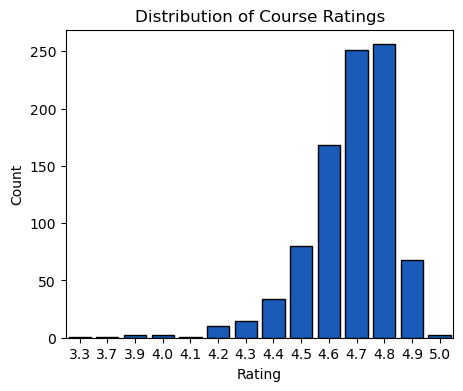

In [10]:
# Plot a bar chart of course ratings
plot_countplot(df, 'rating', title='Distribution of Course Ratings', xlabel='Rating')

The bar chart of course ratings further supports previous observation, showing that a large number of courses are rated between 4.6 and 4.8. This concentration in high ratings explains the elevated average rating of 4.68.

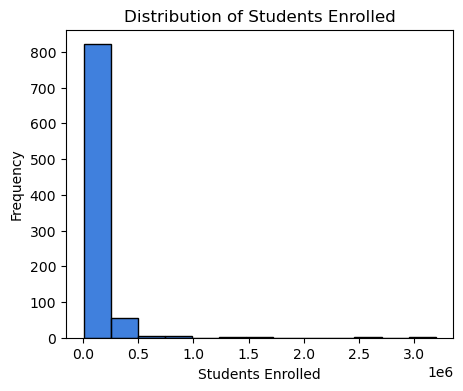

In [11]:
# Plot histogram of students enrolled
plot_histogram(df, 'n_students', bins=13, title='Distribution of Students Enrolled', xlabel='Students Enrolled')

Although the description table above indicated a high variance in the number of students enrolled across courses, the histogram reveals that the vast majority of courses have fewer than 250,000 students enrolled. This suggests that while a small number of courses have very high enrollment, most courses attract significantly fewer students, contributing to the observed variance.

Pearson correlation coefficient between course rating and students enrolled: 0.07


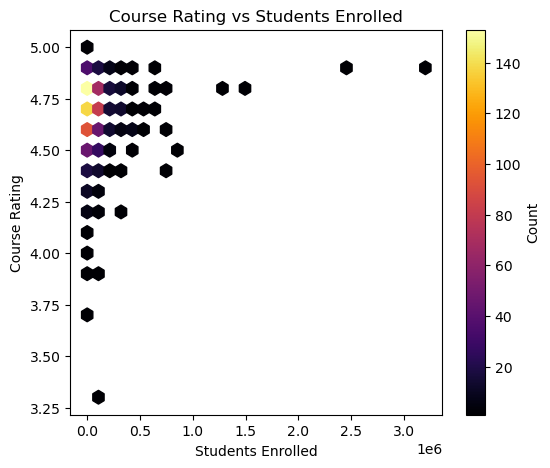

In [12]:
# A hexbin plot of correlation between course rating and students enrolled
plt.figure(figsize=(6, 5))
hb = plt.hexbin(df['n_students'], df['rating'], gridsize=30, cmap='inferno', mincnt=1)
plt.colorbar(hb, label='Count')
plt.title('Course Rating vs Students Enrolled')
plt.xlabel('Students Enrolled')
plt.ylabel('Course Rating')

correlation = df['rating'].corr(df['n_students'])
print(f'Pearson correlation coefficient between course rating and students enrolled: {correlation:.2f}')

The hexbin plot illustrates the relationship between course ratings and the number of students enrolled. The plot shows that there is no significant linear correlation between these two features, as evidenced by the Pearson correlation coefficient of 0.07. This suggests that higher or lower course ratings do not directly influence the number of students enrolled in a course.

Having explored the numerical features such as course ratings and student enrollments, it's now essential to shift focus towards the categorical aspects of the dataset. One of the most critical questions for both learners and Coursera itself is identifying the top course providers and the best courses on the platform. By evaluating these organizations and courses, we can gain insights into which institutions consistently deliver high-quality content and which individual courses stand out in terms of both reach and educational impact. This analysis will help highlight the organizations and courses that are most valued by learners, providing a deeper understanding of what drives success on the platform.

### What are the best course providers on the Coursera platform?

From the first glance, to answer this question, we would just look at the organization's average rating and decide which one would be better compared to others. But there is a problem with that approach: the difference in number of courses provided by organizations. The values go from about 60 all the way down to 1 for several organizations. And while we can be sure the ratings of organizations with many courses are somewhat close to the real quality of the provided content, the ratings for bottom organizations can be highly skewed because of the small sample sizes.

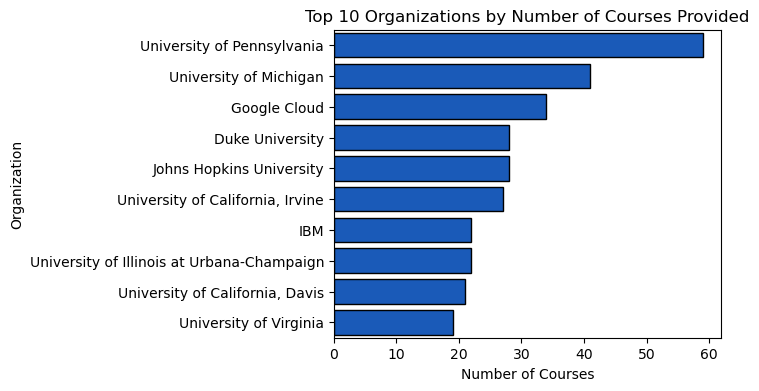

In [13]:
# Aggregate data to count the number of courses provided by each organisation
org_course_count = df['organization'].value_counts().reset_index()
org_course_count.columns = ['organization', 'course_count']

# Plot the top 10 organisations by number of courses provided
plot_nlargest(org_course_count, column='course_count', n=10, sort_column='organization', 
              title='Top 10 Organizations by Number of Courses Provided', 
              xlabel='Number of Courses', ylabel='Organization')

In [14]:
one_count = org_course_count[org_course_count['course_count'] == 1].shape[0]
print(f'There are {one_count} organizations that only provide 1 course. That is {(one_count / org_count * 100):.0f}% of all organizations.')

There are 49 organizations that only provide 1 course. That is 32% of all organizations.


In [15]:
# Aggregate data to count the number of courses provided by each organisation and its average rating
org_avg_rating = df.groupby('organization')['rating'].agg(['mean', 'count']).reset_index()
org_avg_rating.columns = ['organization', 'avg_rating', 'course_count']

org_avg_rating.sort_values('avg_rating', ascending=False).head(10)

,organization,avg_rating,course_count
36,Hebrew University of Jerusalem,4.90,1
61,"Nanyang Technological University, Singapore",4.90,1
112,Universidade Estadual de Campinas,4.90,1
19,Crece con Google,4.90,1
51,London Business School,4.90,1
33,Google - Spectrum Sharing,4.90,1
83,ScrumTrek,4.90,1
113,Universidade de São Paulo,4.87,3
95,The University of Chicago,4.85,2
111,Universidad de los Andes,4.82,5


To resolve this issue, a Bayesian average approach was used, which is a statistical method that adjusts an organization’s average rating by considering the overall global mean and the number of courses offered by the organization. This method is particularly effective in handling the variability introduced by different sample sizes—small sample sizes (few courses) are more susceptible to extreme ratings, which may not be representative of the organization’s overall quality. The Bayesian adjustment mitigates this by pulling the organization’s rating closer to the global average, thereby providing a more reliable estimate of its quality. Conversely, organizations with a large number of courses already have a more stable average, and their Bayesian adjustment is less pronounced.

In the resulting tables, we see that organizations with a smaller number of courses, experience a noticeable boost (if their rating is **smaller** than global mean) or penalty (if their rating is **larger** than global mean) in their Bayesian average ratings compared to their raw average ratings. This reflects the method's tendency to smooth out the uncertainty associated with smaller datasets by pulling ratings towards the global mean. On the other hand, organizations with larger numbers of courses, see less fluctuation in their Bayesian averages. This is due to their more stabilized ratings being adjusted conservatively, reflecting their larger course count and thus higher confidence in their mean ratings.

#### Top 10 Organizations by Rating (Bayesian-adjusted)

In [16]:
def bayesian_average(row, global_mean, count_col, m):
    """
    Calculates the Bayesian average for a given entity's ratings.

    :row: A row of the DataFrame containing 'avg_rating' and the count column (e.g., 'course_count' or 'n_students').
    :global_mean: The global average rating across all entities (e.g., courses or organizations).
    :count_col: The column name for the count data (e.g., 'course_count' or 'n_students').
    :m: A constant that represents the strength of the prior belief (the global average).
    :return: The Bayesian average rating for the entity.
    """
    return (row[count_col] * row['avg_rating'] + m * global_mean) / (row[count_col] + m)

# Calculate the global average rating
global_avg_rating = df['rating'].mean()

# Apply Bayesian average to normalize ratings for organizations
org_avg_rating['bayesian_avg_rating'] = org_avg_rating.apply(
    bayesian_average, 
    axis=1, 
    global_mean=global_avg_rating, 
    count_col='course_count', 
    m=6  # average course count per organization ~ 6
)

# Display Top 10 organizations
org_avg_rating.sort_values(by='bayesian_avg_rating', ascending=False).head(10)

,organization,avg_rating,course_count,bayesian_avg_rating
148,Yale University,4.82,17,4.78
9,Berklee College of Music,4.81,14,4.77
55,Macquarie University,4.80,9,4.75
85,Stanford University,4.77,16,4.74
111,Universidad de los Andes,4.82,5,4.74
113,Universidade de São Paulo,4.87,3,4.74
116,Universiteit Leiden,4.77,9,4.73
92,The Museum of Modern Art,4.78,6,4.73
109,Universidad Nacional Autónoma de México,4.75,14,4.73
4,Arizona State University,4.77,7,4.73


#### Bottom 10 Organizations by Rating (Bayesian-adjusted)

In [17]:
org_avg_rating.sort_values(by='bayesian_avg_rating', ascending=True).head(10)

,organization,avg_rating,course_count,bayesian_avg_rating
94,The State University of New York,4.28,4,4.52
65,New York Institute of Finance,4.30,2,4.58
31,"Goldsmiths, University of London",4.45,4,4.59
107,Unity,4.35,2,4.60
34,Google Cloud,4.58,34,4.60
66,New York University,4.50,5,4.60
27,Emory University,4.50,5,4.60
63,National Research University Higher School of Economics,4.53,7,4.60
123,"University of California, Irvine",4.60,27,4.61
1,Amazon Web Services,4.55,6,4.61


The Bayesian average adjustment provides a more balanced evaluation of course providers by accounting for the variability in course count. While the raw average ratings might give the impression that smaller providers are the best, the Bayesian approach reveals a more nuanced picture. Larger organizations with a substantial number of courses tend to maintain their position in the rankings, reflecting consistent quality across a broad offering. Meanwhile, organizations with fewer courses see their ratings moderated, offering a more reliable representation of their true standing. Ultimately, this method allows us to identify top providers with greater confidence, ensuring that the ratings reflect not just the highest scores but the consistency and reliability of their educational offerings.

### What are the best courses on the Coursera platform?

The same problem we just looked into with organizations' rankings can be seen with those of courses themselves. While some courses have more than 1 million of students, others struggle to reach out to 2k students. The variance is even bigger in this case, compared to the one above, so the Bayesian average approach is more strict this time.

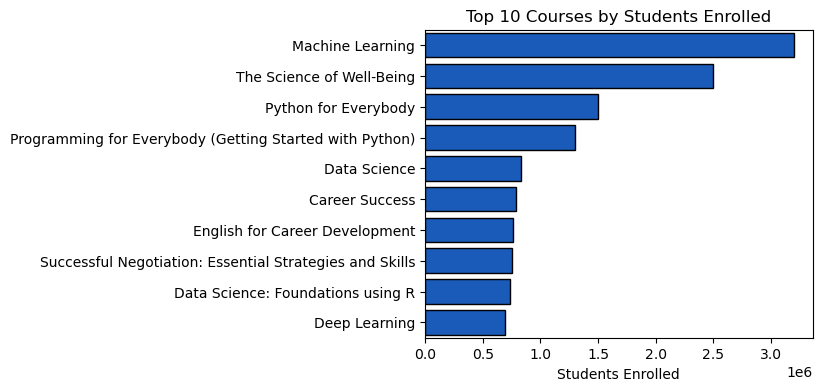

In [18]:
# Plot top 10 courses by students enrolled
plot_nlargest(df, 'n_students', n=10, sort_column='title', 
              title='Top 10 Courses by Students Enrolled', xlabel='Students Enrolled')

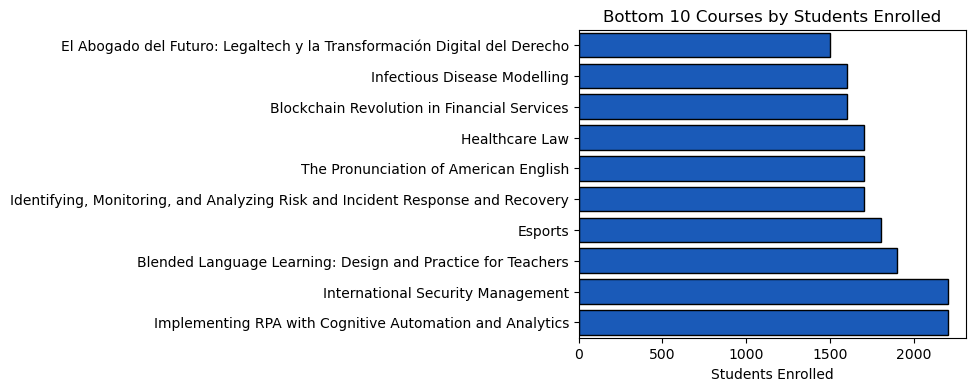

In [19]:
# Plot bottom 10 courses by students enrolled
plot_nsmallest(df, 'n_students', n=10, sort_column='title', 
               title='Bottom 10 Courses by Students Enrolled', xlabel='Students Enrolled')

In [20]:
# Aggregate data to calculate the average rating and total number of students per course
course_avg_rating = df.groupby(['title', 'certificate_type']).agg(
    avg_rating=('rating', 'mean'),
    n_students=('n_students', 'sum')
).reset_index()

# Display Top 10 courses
course_avg_rating[['title','avg_rating','n_students']].sort_values('avg_rating', ascending=False).head(10)

,title,avg_rating,n_students
251,El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho,5.00,1500
432,Infectious Disease Modelling,5.00,1600
754,Stories of Infection,4.90,28000
290,Everyday Parenting: The ABCs of Child Rearing,4.90,86000
98,Boosting Creativity for Innovation,4.90,9500
99,"Brand Management: Aligning Business, Brand and Behaviour",4.90,57000
614,More Introduction to Financial Accounting,4.90,40000
102,Bugs 101: Insect-Human Interactions,4.90,15000
836,Understanding Einstein: The Special Theory of Relativity,4.90,89000
103,Build a Modern Computer from First Principles: From Nand to Tetris (Project-Centered Course),4.90,95000


#### Top 10 Courses by Rating (Bayesian-adjusted)

In [21]:
# Calculate the global average rating
global_avg_rating = df['rating'].mean()

# Apply Bayesian average to normalize ratings for courses
course_avg_rating['bayesian_avg_rating'] = course_avg_rating.apply(
    bayesian_average, 
    axis=1, 
    global_mean=global_avg_rating, 
    count_col='n_students', 
    m=42000  # median student count per course ~ 42k
)

# Display Top 10 courses
course_avg_rating[['title','avg_rating','n_students','bayesian_avg_rating']].sort_values(by='bayesian_avg_rating', 
                                                                                         ascending=False).head(10)

,title,avg_rating,n_students,bayesian_avg_rating
563,Machine Learning,4.90,3200000,4.90
815,The Science of Well-Being,4.90,2500000,4.90
626,Neural Networks and Deep Learning,4.90,630000,4.89
684,Python Data Structures,4.90,420000,4.88
322,First Step Korean,4.90,400000,4.88
512,Introduction to Psychology,4.90,270000,4.87
427,"Improving Deep Neural Networks: Hyperparameter tuning, Regularization and Optimization",4.90,270000,4.87
162,Convolutional Neural Networks,4.90,240000,4.87
291,Excel Skills for Business,4.90,240000,4.87
124,COVID-19 Contact Tracing,4.90,220000,4.86


#### Bottom 10 Courses by Rating (Bayesian-adjusted)

In [22]:
course_avg_rating[['title','avg_rating','n_students','bayesian_avg_rating']].sort_values(by='bayesian_avg_rating', 
                                                                                         ascending=True).head(10)

,title,avg_rating,n_students,bayesian_avg_rating
413,How To Create a Website in a Weekend! (Project-Centered Course),3.30,140000,3.62
873,iOS App Development with Swift,3.90,76000,4.18
590,Mastering Data Analysis in Excel,4.20,280000,4.26
566,Machine Learning and Reinforcement Learning in Finance,3.70,29000,4.28
182,Cybersecurity and Its Ten Domains,4.20,140000,4.31
515,Introduction to Spreadsheets and Models,4.20,76000,4.37
676,Project Execution,4.20,70000,4.38
598,Mathematics for Machine Learning: PCA,4.00,33000,4.38
172,Creative Problem Solving,4.30,140000,4.39
129,Career Success,4.40,790000,4.41


Applying the Bayesian average to course ratings helps us address the substantial variance in student enrollment across different courses. While raw ratings might suggest that less popular courses are the highest quality, the Bayesian adjustment provides a more reliable ranking by accounting for the variability in student numbers. As a result, courses with a large number of students, like 'Machine Learning' and 'The Science of Well-Being,' maintain their top positions, reflecting their consistent quality across a broad audience. Conversely, highly-rated but less-enrolled courses are moderated, offering a fairer assessment of their true standing. This approach ensures that the top-ranked courses not only achieve high ratings but also demonstrate reliability and consistency in their educational impact.

After identifying the top-performing organizations and courses on Coursera, it's important to explore the remaining key categorical features—certificate types and difficulty levels. These dimensions offer further insights into how different types of certifications and varying levels of course difficulty impact learner engagement and success. By analyzing these factors, we can understand how Coursera's content is structured and how it caters to diverse learner needs, ultimately helping to refine and optimize the platform's educational offerings.

### What is the course distribution among Certificate Types and Difficulties?

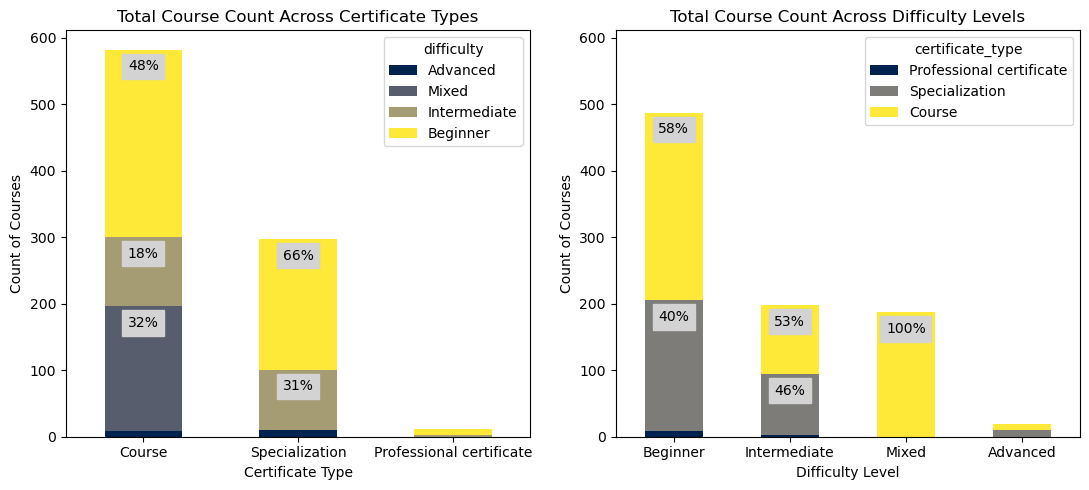

In [23]:
# Define the custom order for the certificate types
cert_custom_order = ['Professional certificate', 'Specialization', 'Course']
diff_custom_order = ['Advanced', 'Mixed', 'Intermediate', 'Beginner']

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

# Set the maximum y-axis value for consistency across plots
y_max_courses = max(df['difficulty'].value_counts().max(), df['certificate_type'].value_counts().max())

# Distribution of Difficulties for Each Certificate Type
plot_stacked_bar_chart(
    df, 
    index='certificate_type', 
    columns='difficulty', 
    title='Total Course Count Across Certificate Types', 
    xlabel='Certificate Type', 
    ylabel='Count of Courses', 
    ax=ax1, 
    y_max=y_max_courses,
    custom_order=diff_custom_order,
    label_threshold=10
)

# Distribution of Certificate Types for Each Difficulty Level
plot_stacked_bar_chart(
    df, 
    index='difficulty', 
    columns='certificate_type', 
    title='Total Course Count Across Difficulty Levels', 
    xlabel='Difficulty Level', 
    ylabel='Count of Courses', 
    ax=ax2, 
    y_max=y_max_courses,
    custom_order=cert_custom_order,
    label_threshold=10
)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The left chart shows that the 'Course' certificate type has the highest number of courses, with a significant majority of these courses at the 'Beginner' level (48%). The 'Specialization' certificate type is heavily weighted towards 'Beginner' and 'Intermediate' courses, making up 66% and 31% respectively. 'Professional Certificates' have very few courses overall, with a noticeable proportion still categorized at the 'Beginner' level.

The right chart indicates that 'Beginner' level courses are predominant across the platform, with 58% of the courses categorized as 'Course' type. The 'Intermediate' and 'Mixed' difficulty levels have fewer courses, with 'Intermediate' having a close to 50/50 distribution of 'Course' and 'Specialization' types, while 'Mixed' courses being entirely tied to 'Course' type. The 'Advanced' level has the least representation, indicating that the platform focuses more on introductory and intermediate content.

### What is the student distribution among Certificate Types and Difficulties?

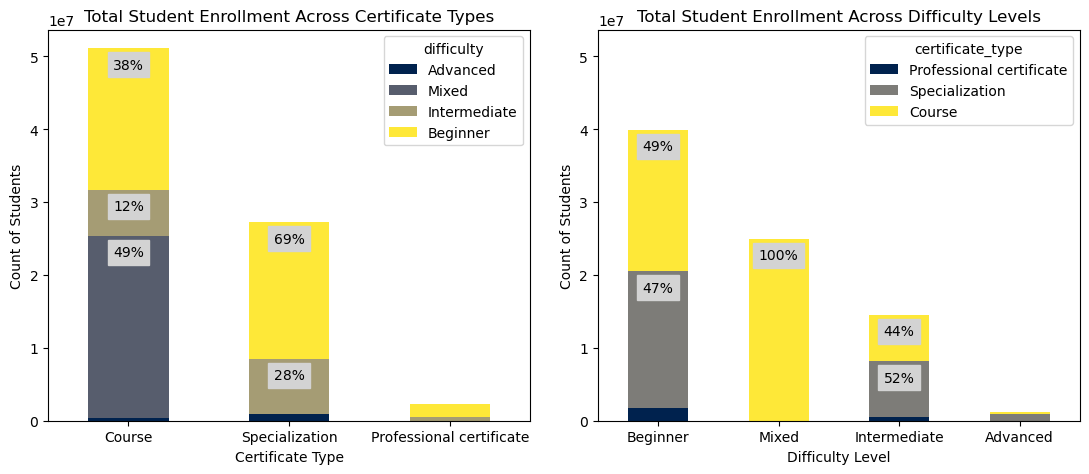

In [24]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

# Set the maximum y-axis value for consistency across plots
y_max_students = max(df.groupby('certificate_type')['n_students'].agg('sum').max(), 
                     df.groupby('difficulty')['n_students'].agg('sum').max())

# Distribution of Students for Each Certificate Type
plot_stacked_bar_chart(
    df, 
    index='certificate_type', 
    columns='difficulty',
    values='n_students', 
    aggfunc='sum', 
    title='Total Student Enrollment Across Certificate Types', 
    xlabel='Certificate Type', 
    ylabel='Count of Students', 
    ax=ax1, 
    y_max=y_max_students,
    custom_order=diff_custom_order,
    label_threshold=3000000
)

# Distribution of Students for Each Difficulty Level
plot_stacked_bar_chart(
    df, 
    index='difficulty', 
    columns='certificate_type',
    values='n_students', 
    aggfunc='sum', 
    title='Total Student Enrollment Across Difficulty Levels', 
    xlabel='Difficulty Level', 
    ylabel='Count of Students', 
    ax=ax2, 
    y_max=y_max_students,
    custom_order=cert_custom_order,
    label_threshold=3000000
)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The left chart more or less repeats the pattern of the previous chart and reveals that most students are enrolled in 'Course' type certificates, but a significant portion of students are also attracted to 'Specialization' certificates, despite the smaller number of courses. 'Professional Certificate' continues to show lower overall student enrollment, and the majority of students enrolled in these certificates are still in 'Beginner' level courses.

The right chart shows that 'Beginner' level courses attract the highest number of students, which is consistent with the large number of such courses available. Interestingly, while 'Intermediate' and 'Mixed' levels have a similar number of courses offered (as shown in the first set of charts), the 'Mixed' courses attract significantly more students than the 'Intermediate' courses. This suggests that 'Mixed' level courses, which might combine elements of both beginner and advanced content, are more popular with students, possibly due to their flexibility and the broad range of skills they cover. 'Advanced' courses, as expected, have the fewest students, reflecting their more specialized nature and limited availability.

### How do student enrollment distributions vary across different Certificate Types and Difficulty Levels?

While the stacked bar charts provide a valuable overview of the total student enrollments by certificate type and difficulty level, they offer only a high-level snapshot of the data. These charts highlight the overall distribution of students across categories but do not reveal the underlying variability within each category. Given the potential for high variance in student enrollments, it's important to dive deeper into the distribution of student numbers to understand how this variance might impact the overall picture.

To achieve this, we turn to violin plots, which allow us to visualize the full distribution of student enrollments within each category. Unlike bar charts, which summarize data with a single aggregate measure, violin plots provide insights into the spread and concentration of data points within each category. By examining these distributions, we can uncover patterns that are not immediately apparent in the aggregated bar charts, such as the presence of courses with exceptionally high or low enrollments and the degree of consistency in student numbers across different course types and difficulty levels.

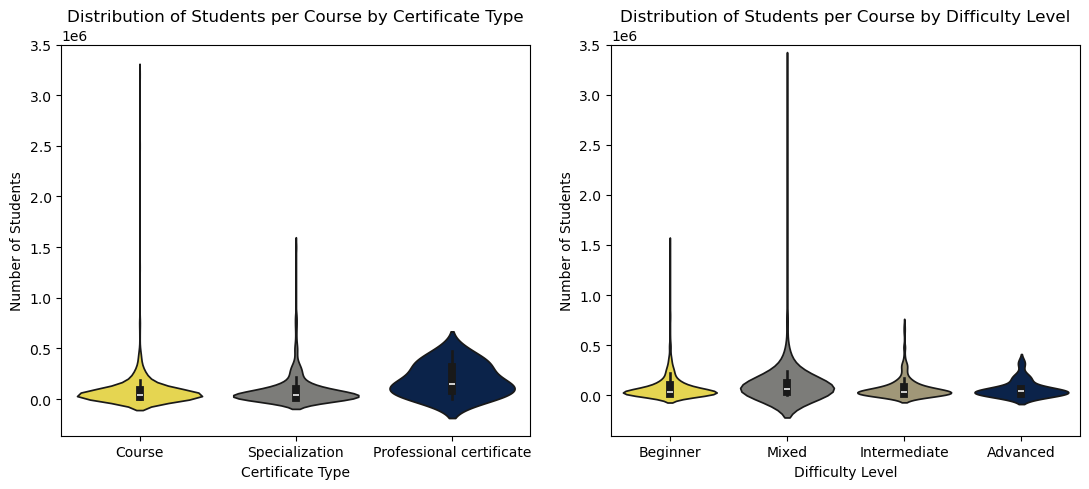

In [25]:
# Define parameters
student_count_column = 'n_students'
x_labels = ('Certificate Type', 'Difficulty Level')
titles = (
    'Distribution of Students per Course by Certificate Type',
    'Distribution of Students per Course by Difficulty Level'
)
order_cert = ['Course', 'Specialization', 'Professional certificate']
order_diff = ['Beginner', 'Mixed', 'Intermediate', 'Advanced']
palette_cert = ['#002154', '#7d7c78', '#fee938']
palette_diff = ['#fee938', '#7d7c78', '#a79b71', '#002154']

# Call the function
plot_violin_grid(df, student_count_column, x_labels, titles, 
                 palette_cert, palette_diff, order_cert, order_diff, y_max=3500000)

The violin plot for certificate types reveals that 'Course' certificates exhibit a broad distribution of student enrollments, with a noticeable long tail extending towards higher numbers. This indicates that while most 'Courses' have moderate enrollments, a few attract exceptionally large numbers of students, possibly due to their broader appeal or more accessible content. On the other hand, 'Specialization' certificates show a more concentrated distribution, reflecting more consistent student numbers across these courses. The distribution for 'Professional Certificates,' though relatively narrower, still indicates significant enrollments for a select few courses, highlighting their value and appeal in professional settings despite their smaller overall presence on the platform.

The violin plot for difficulty levels shows the popularity of 'Mixed' difficulty courses, which not only have a wide distribution but also a substantial peak, indicating that these courses are particularly effective in attracting a large and diverse audience. This could be attributed to the flexibility and broad appeal of 'Mixed' courses, which cater to both beginners and more advanced learners. The 'Beginner' courses, while numerous, have a more narrow distribution, suggesting that most attract a moderate number of students, with fewer outliers. This reflects the introductory nature of these courses, which are essential for onboarding new learners but might not reach the high enrollments seen in more specialized content. 'Intermediate' and 'Advanced' courses show even narrower distributions, with the latter being particularly tight, indicating that these courses appeal to a smaller, more targeted audience.

## 4. TL;DR

Throughout this analysis, we have explored various aspects of Coursera's dataset, focusing on course ratings, student enrollment, and the performance of course providers. The investigation began with a detailed examination of the numerical features, where it was observed that while most courses have high ratings (typically between 4.6 and 4.8), there is a significant variance in student enrollment. The lack of correlation between course ratings and student numbers suggests that factors other than perceived quality influence enrollment.

To address the challenges posed by differing sample sizes among course providers and courses, we applied a Bayesian average approach. This method adjusted ratings by considering both the global mean and the number of courses or students involved. The adjusted ratings provided a more balanced view, revealing that while small providers or courses with fewer enrollments initially appeared to rank highly, their ratings were moderated when accounting for the smaller sample sizes. Larger providers and courses with substantial enrollments maintained their top positions, underscoring their consistent quality.

When examining certificate types and difficulty levels, we observed distinct patterns in course distribution and student enrollment. The violin plots provided a deeper understanding of these patterns. For certificate types, 'Course' certificates showed a broad distribution of student enrollments, with some courses attracting exceptionally high numbers, indicating a diverse range of appeal. 'Specialization' certificates, by contrast, demonstrated a more consistent enrollment pattern, while 'Professional Certificates,' though fewer in number, showed significant enrollments for specific courses, underscoring their targeted professional value.

The violin plots for difficulty levels highlighted the popularity of 'Mixed' difficulty courses, which not only had a broad and substantial distribution but also attracted large student numbers, likely due to their flexibility in catering to a wide audience. 'Beginner' courses, while numerous, had a more moderate distribution of enrollments, reflecting their role in onboarding new learners. 'Intermediate' and 'Advanced' courses, with narrower distributions, attracted more specialized audiences, indicating their appeal to learners seeking more targeted, in-depth knowledge.

#### Recommendations and Further Steps

Based on these findings, Coursera could consider increasing the availability of 'Mixed' difficulty courses, given their popularity among students. Additionally, while focusing on maintaining a high standard of beginner courses, there is potential value in expanding intermediate and advanced-level offerings to cater to more advanced learners.

For further analysis, it would be beneficial to explore additional factors influencing course enrollment, such as marketing efforts, course duration, or subject matter. Incorporating more data on course completion rates and learner feedback could also provide deeper insights into course quality and effectiveness. 